### EDA + Preprocessing

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("data.csv")

# Let's see the first few rows
print("First 5 rows of the dataset:")
print(df.head())

# And get a summary of its structure
print("\nDataset Info:")
df.info()

# Basic descriptive statistics for numerical columns
print("\nDescriptive Statistics:")
print(df.describe())

First 5 rows of the dataset:
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural      

## Visualization
#### Categorial Visualization

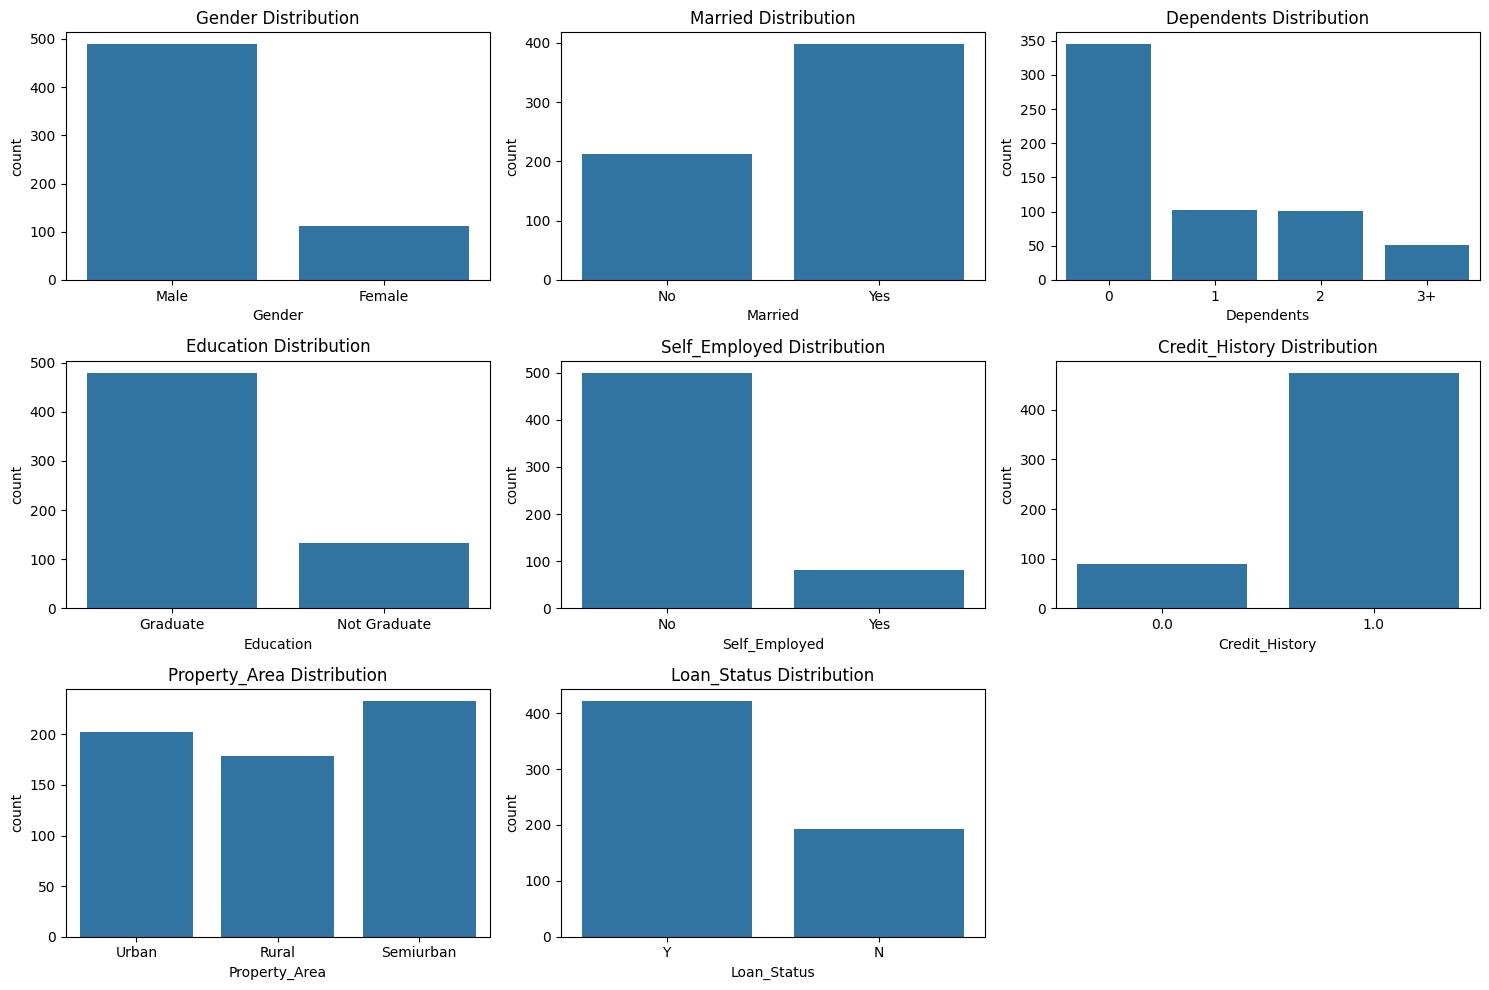

In [8]:
plt.figure(figsize=(15, 10))
plt.subplot(3, 3, 1)
sns.countplot(data=df, x='Gender')
plt.title('Gender Distribution')

plt.subplot(3, 3, 2)
sns.countplot(data=df, x='Married')
plt.title('Married Distribution')

plt.subplot(3, 3, 3)
sns.countplot(data=df, x='Dependents')
plt.title('Dependents Distribution')

plt.subplot(3, 3, 4)
sns.countplot(data=df, x='Education')
plt.title('Education Distribution')

plt.subplot(3, 3, 5)
sns.countplot(data=df, x='Self_Employed')
plt.title('Self_Employed Distribution')

plt.subplot(3, 3, 6)
sns.countplot(data=df, x='Credit_History')
plt.title('Credit_History Distribution')

plt.subplot(3, 3, 7)
sns.countplot(data=df, x='Property_Area')
plt.title('Property_Area Distribution')

plt.subplot(3, 3, 8)
sns.countplot(data=df, x='Loan_Status')
plt.title('Loan_Status Distribution')

plt.tight_layout()
plt.show()

#### Numerical Features: Histograms and Box Plots

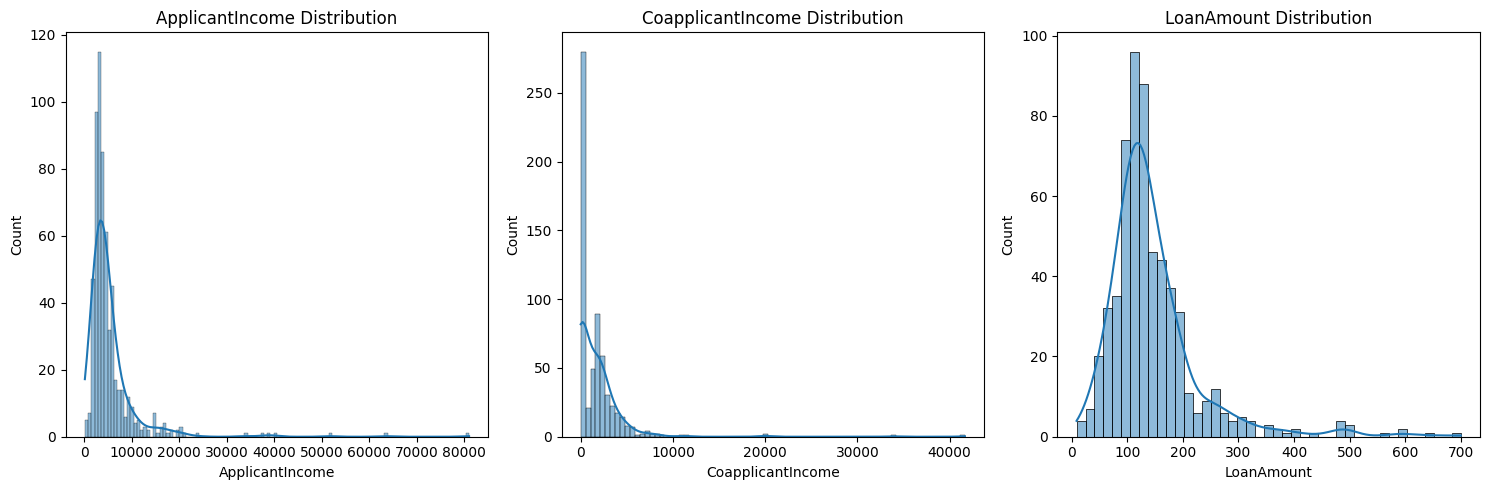

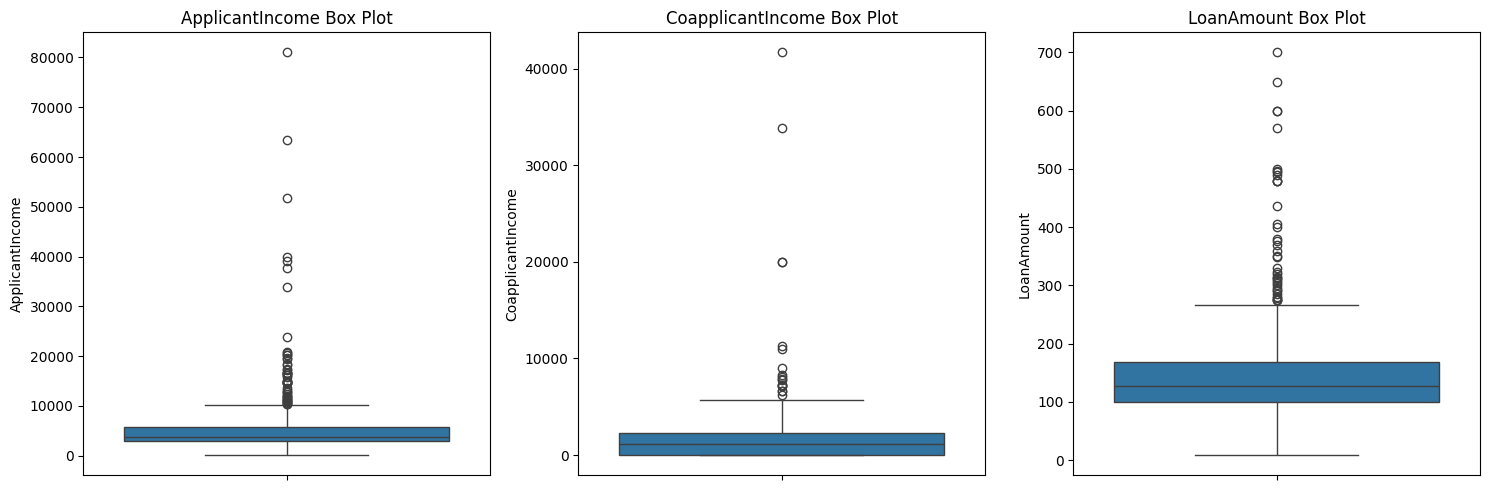

In [9]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(df['ApplicantIncome'], kde=True)
plt.title('ApplicantIncome Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df['CoapplicantIncome'], kde=True)
plt.title('CoapplicantIncome Distribution')

plt.subplot(1, 3, 3)
sns.histplot(df['LoanAmount'], kde=True)
plt.title('LoanAmount Distribution')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(y=df['ApplicantIncome'])
plt.title('ApplicantIncome Box Plot')

plt.subplot(1, 3, 2)
sns.boxplot(y=df['CoapplicantIncome'])
plt.title('CoapplicantIncome Box Plot')

plt.subplot(1, 3, 3)
sns.boxplot(y=df['LoanAmount'])
plt.title('LoanAmount Box Plot')
plt.tight_layout()
plt.show()

### Preprocessing

In [10]:
print("\nMissing Values Count:")
print(df.isnull().sum())

print("\nMissing Values Percentage:")
print((df.isnull().sum() / len(df)) * 100)


Missing Values Count:
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Missing Values Percentage:
Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64


#### Handling Missing Values

In [11]:
# Impute missing values for categorical columns with the mode
for col in ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Impute missing values for numerical columns with the median (due to potential outliers)
for col in ['LoanAmount', 'Loan_Amount_Term']:
    df[col].fillna(df[col].median(), inplace=True)

print("\nMissing Values after Imputation:")
print(df.isnull().sum()) # Should all be 0 now!


Missing Values after Imputation:
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


C:\Users\Shrijith\AppData\Local\Temp\ipykernel_6408\1784804194.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
C:\Users\Shrijith\AppData\Local\Temp\ipykernel_6408\1784804194.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

#### Handling Outliers

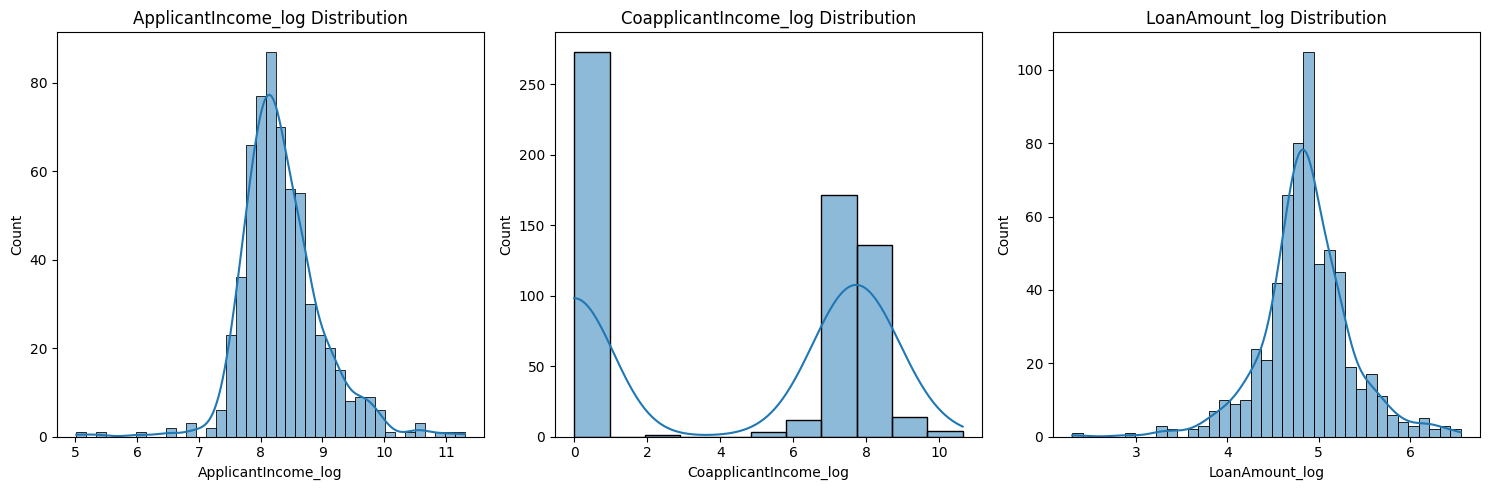

In [12]:
# Apply log transformation to skewed numerical features if needed
# This helps in reducing the impact of outliers and making the distribution more normal.
df['ApplicantIncome_log'] = np.log(df['ApplicantIncome'] + 1) # Add 1 to avoid log(0)
df['CoapplicantIncome_log'] = np.log(df['CoapplicantIncome'] + 1)
df['LoanAmount_log'] = np.log(df['LoanAmount'] + 1)

# You can also create a 'Total_Income' feature
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['Total_Income_log'] = np.log(df['Total_Income'] + 1)

# Let's visualize the log-transformed distributions
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(df['ApplicantIncome_log'], kde=True)
plt.title('ApplicantIncome_log Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df['CoapplicantIncome_log'], kde=True)
plt.title('CoapplicantIncome_log Distribution')

plt.subplot(1, 3, 3)
sns.histplot(df['LoanAmount_log'], kde=True)
plt.title('LoanAmount_log Distribution')
plt.tight_layout()
plt.show()

####  Encoding Categorical Features

In [13]:
# Drop the original non-transformed income and loan amount columns
df = df.drop(columns=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_ID'])

# Handle 'Dependents' column: Convert '3+' to 3 and then to int
df['Dependents'] = df['Dependents'].replace('3+', '3').astype(int)

# One-hot encode categorical features
# Drop_first=True helps avoid multicollinearity (dummy variable trap)
df = pd.get_dummies(df, columns=['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area'], drop_first=True)

# Encode the target variable 'Loan_Status'
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Loan_Status'] = le.fit_transform(df['Loan_Status']) # 'N' becomes 0, 'Y' becomes 1

print("\nDataFrame after Encoding:")
print(df.head())
print("\nDataFrame Info after Preprocessing:")
df.info()


DataFrame after Encoding:
   Dependents  Loan_Amount_Term  Credit_History  Loan_Status  \
0           0             360.0             1.0            1   
1           1             360.0             1.0            0   
2           0             360.0             1.0            1   
3           0             360.0             1.0            1   
4           0             360.0             1.0            1   

   ApplicantIncome_log  CoapplicantIncome_log  LoanAmount_log  Total_Income  \
0             8.674197               0.000000        4.859812        5849.0   
1             8.430327               7.319202        4.859812        6091.0   
2             8.006701               0.000000        4.204693        3000.0   
3             7.857094               7.765993        4.795791        4941.0   
4             8.699681               0.000000        4.955827        6000.0   

   Total_Income_log  Gender_Male  Married_Yes  Education_Not Graduate  \
0          8.674197         True        